# ATP viability and inflection points

In [1]:
import numpy as np
import scipy.optimize as optim
import math
import os,sys
import pandas as pd
import copy
import scipy.stats as st
from scipy.stats import t
import matplotlib.pyplot as plt
from matplotlib import rcParams

**Read viability and T2 inflection points**

In [2]:
cwd = os.getcwd()
data_directory = './data/ATP'
os.chdir(data_directory)

all_studies = {}

all_studies['Study1'] = pd.read_csv('ATP-T2-Study1.csv')
all_studies['Study2'] = pd.read_csv('ATP-T2-Study2.csv')
all_studies['Study3'] = pd.read_csv('ATP-T2-Study3.csv')

In [3]:
atps, t2s = {}, {}

for k in all_studies.keys():
    t2s[k] = [round(x,2) for x in all_studies[k]['T2'][:-1] if math.isnan(x) == False]
    print(k,'\t T2\t',t2s[k])
        
    atps[k] = [round(x,2) for x in all_studies[k]['ATP'][:-1] if math.isnan(x) == False]
    print(k,'\t ATP\t',atps[k])

Study1 	 T2	 [83.63, 98.69, 104.51, 159.64, 167.32, 204.8]
Study1 	 ATP	 [0.74, 0.55, 0.55, 0.54, 0.5, 0.44]
Study2 	 T2	 [83.63, 98.69, 104.51, 159.64, 167.32, 204.8]
Study2 	 ATP	 [0.89, 0.8, 0.81, 0.74, 0.71, 0.71]
Study3 	 T2	 [83.63, 98.69, 104.51, 159.64, 167.32, 204.8]
Study3 	 ATP	 [0.82, 0.69, 0.68, 0.66, 0.63, 0.65]


For computing CI of the model parameters.

In [4]:
tinv = lambda p, df: abs(t.ppf(p/2,df))

**Fit $\log[\mathrm{ATP}]$-vs-T2.**

In [5]:
atpfits, t2fits, fitnames = {}, {}, {}
t2_up, t2_low = {}, {}
t2_up1, t2_low1 = {}, {}

for k in all_studies.keys():
    x = atps[k]
    y = t2s[k]
    
    dof = len(x) - 2
    
    ts = tinv(0.05,dof)

    result = st.linregress(np.log(x),np.log(y),alternative='two-sided')
    
    fitnames[k] = r'T2 = ' + str(round(math.exp(result.intercept),2)) + '([ATP])$^{'+ str(round(result.slope,1)) + '}$'
    
    if k=='Study1':
        atpfits[k] = np.linspace(0.4,0.75,101)
    elif k=='Study2':
        atpfits[k] = np.linspace(0.7,0.9,101)
    elif k=='Study3':
        atpfits[k] = np.linspace(0.6,0.85,101)
        
    t2fits[k] = np.exp(result.slope*np.log(atpfits[k]) + result.intercept)
        
    ts = tinv(0.05,dof)

    s_err = 2*result.stderr
    i_err = 2*result.intercept_stderr
    
    s_up, i_up = result.slope + s_err, result.intercept - i_err
    s_low, i_low = result.slope - s_err, result.intercept + i_err
    
    t2_up[k] = np.exp(s_up*np.log(atpfits[k]) + i_up)
    t2_low[k] = np.exp(s_low*np.log(atpfits[k]) + i_low)
    
    s_err = result.stderr
    i_err = result.intercept_stderr
    
    s_up, i_up = result.slope + s_err, result.intercept - i_err
    s_low, i_low = result.slope - s_err, result.intercept + i_err
    
    t2_up1[k] = np.exp(s_up*np.log(atpfits[k]) + i_up)
    t2_low1[k] = np.exp(s_low*np.log(atpfits[k]) + i_low)
    
    residual = np.exp(result.slope*np.log(x) + result.intercept) - y
    reduced_chi = math.sqrt(np.dot(residual,residual)/dof)
    
    print(k,'\t reduced-chisquare: ', reduced_chi)

Study1 	 reduced-chisquare:  25.94945827204781
Study2 	 reduced-chisquare:  16.790491941906183
Study3 	 reduced-chisquare:  34.028965660495786


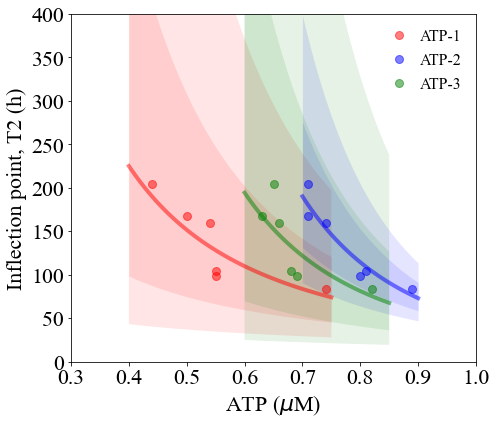

In [6]:
studies = ['Study1','Study2','Study3']

fig, axs = plt.subplots(figsize=(7,6))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

color_list = {'Study1':'red','Study2':'blue','Study3':'green'}

for k in all_studies.keys():
    labelname = k.replace('Study','ATP-')
    plt.plot(atps[k],t2s[k],marker='o',ms=8,color=color_list[k],alpha=0.5,linewidth=0,label=labelname)

    plt.plot(atpfits[k],t2fits[k],linewidth=4,color=color_list[k],alpha=0.5)#,label=fitnames[k])

    plt.fill_between(atpfits[k],t2_up[k],t2_low[k],alpha=0.1,color=color_list[k],linewidth=0.0)
    plt.fill_between(atpfits[k],t2_up1[k],t2_low1[k],alpha=0.1,color=color_list[k],linewidth=0.0)

plt.xticks(size=22)
plt.yticks(size=22)  
plt.xlabel(r'ATP ($\mu$M)',size=22)
plt.ylabel(r'Inflection point, T2 (h)',size=22,rotation=90)
plt.xlim(0.3,1.0)
plt.ylim(0,400)
#plt.xscale('log')
#plt.yscale('log')
plt.legend(frameon=False,prop={'size': 16,'family':'Times New Roman'},markerscale=1.0,handlelength=1.0,loc='upper right')
plt.tight_layout()

plt.savefig('ATP_day0.png',dpi=300)

**AO/DAPI Day 0 viability.**

In [7]:
aodapi_T2_d0 = pd.read_csv('AODAPIs.csv')

column_names = list(aodapi_T2_d0)

aodapis_d0 = {}

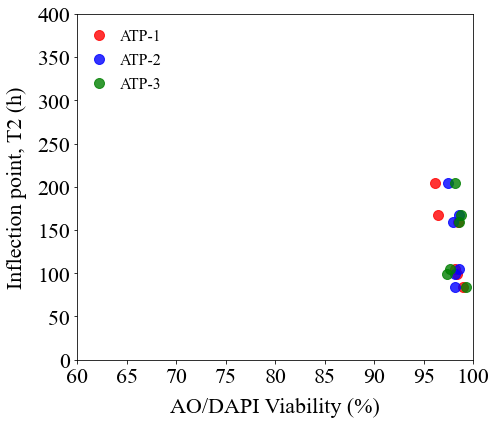

In [8]:
fig, axs = plt.subplots(figsize=(7,6))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

for k in all_studies.keys():
    labelname = k.replace('Study','ATP-')
    plt.plot(aodapi_T2_d0[k][:-1],t2s[k],marker='o',ms=10,color=color_list[k],alpha=0.8,linewidth=0,label=labelname)

plt.xticks(size=22)
plt.yticks(size=22)  
plt.xlabel(r'AO/DAPI Viability (%)',size=22,labelpad=10)
plt.ylabel(r'Inflection point, T2 (h)',size=22,rotation=90,labelpad=10)
plt.xlim(60,100)
plt.ylim(0,400)
plt.legend(frameon=False,prop={'size': 16,'family':'Times New Roman'},markerscale=1.0,handlelength=1.0,loc='upper left')
plt.tight_layout()

plt.savefig('AODAPI_day0.png',dpi=300)